In [14]:
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
import numpy as np
import sklearn
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn import metrics

In [2]:
data = pd.read_csv('steam_reviews.csv')
data1 = pd.read_csv('steam.csv')
data2 = pd.read_csv('steam_games.csv')

In [3]:
data

date_posted  funny  helpful  hour_played  is_early_access_review  \
0       2019-02-10      2        4          578                   False   
1       2019-02-10      0        0          184                   False   
2       2019-02-07      0        0          892                   False   
3       2018-06-14    126     1086          676                   False   
4       2017-06-20     85     2139          612                   False   
...            ...    ...      ...          ...                     ...   
434886  2018-11-17      1       37           10                   False   
434887  2018-11-17      3       41           38                   False   
434888  2018-11-20      0        0           36                   False   
434889  2018-11-18      1       44           12                   False   
434890  2019-01-21      1       28           20                   False   

       recommendation                                             review  \
0         Recommended  &gt Played as German Reich&gt Declare war on B...   
1         Recommended                                               yes.   
2         Recommended  Very good game although a bit overpriced in my...   
3         Recommended  Out of all the reviews I wrote This one is pro...   
4         Recommended  Disclaimer I survivor main. I play games for f...   
...               ...                                                ...   
434886    Recommended  YOUR FLESH WILL ROT AND DECAY.STEEL IS IMMORTA...   
434887    Recommended  Domini and Dominae I believe what we are deali...   
434888    Recommended  First off if you like X Com style of games you...   
434889    Recommended  As a disclaimer I'm an AdMech player on the ta...   
434890    Recommended  Don't listen to people who claim it's the game...   

                                              title  
0       Expansion - Hearts of Iron IV: Man the Guns  
1       Expansion - Hearts of Iron IV: Man the Guns  
2       Expansion - Hearts of Iron IV: Man the Guns  
3                                  Dead by Daylight  
4                                  Dead by Daylight  
...                                             ...  
434886                 Warhammer 40,000: Mechanicus  
434887                 Warhammer 40,000: Mechanicus  
434888                 Warhammer 40,000: Mechanicus  
434889                 Warhammer 40,000: Mechanicus  
434890                 Warhammer 40,000: Mechanicus  

[434891 rows x 8 columns]

In [4]:
data['helpful'].sort_values(ascending=True)

217445        0
285201        0
285200        0
285199        0
285198        0
          ...  
41472      5423
433036     5666
361474    11267
42443     12273
361470    28171
Name: helpful, Length: 434891, dtype: int64

In [5]:
data['hour_played'].sort_values(ascending=True)

17277         0
79420         0
135193        0
171075        0
135192        0
          ...  
393749    17991
395541    22392
426271    22393
113687    22830
122873    31962
Name: hour_played, Length: 434891, dtype: int64

In [6]:
test = data[data.funny < 4200000000]
test['funny'].sort_values(ascending=True)

217454       0
266652       0
408060       0
266650       0
266649       0
          ... 
433075    2785
123281    4780
432874    5274
115665    5438
361472    7472
Name: funny, Length: 434837, dtype: int64

In [7]:
test

date_posted  funny  helpful  hour_played  is_early_access_review  \
0       2019-02-10      2        4          578                   False   
1       2019-02-10      0        0          184                   False   
2       2019-02-07      0        0          892                   False   
3       2018-06-14    126     1086          676                   False   
4       2017-06-20     85     2139          612                   False   
...            ...    ...      ...          ...                     ...   
434886  2018-11-17      1       37           10                   False   
434887  2018-11-17      3       41           38                   False   
434888  2018-11-20      0        0           36                   False   
434889  2018-11-18      1       44           12                   False   
434890  2019-01-21      1       28           20                   False   

       recommendation                                             review  \
0         Recommended  &gt Played as German Reich&gt Declare war on B...   
1         Recommended                                               yes.   
2         Recommended  Very good game although a bit overpriced in my...   
3         Recommended  Out of all the reviews I wrote This one is pro...   
4         Recommended  Disclaimer I survivor main. I play games for f...   
...               ...                                                ...   
434886    Recommended  YOUR FLESH WILL ROT AND DECAY.STEEL IS IMMORTA...   
434887    Recommended  Domini and Dominae I believe what we are deali...   
434888    Recommended  First off if you like X Com style of games you...   
434889    Recommended  As a disclaimer I'm an AdMech player on the ta...   
434890    Recommended  Don't listen to people who claim it's the game...   

                                              title  
0       Expansion - Hearts of Iron IV: Man the Guns  
1       Expansion - Hearts of Iron IV: Man the Guns  
2       Expansion - Hearts of Iron IV: Man the Guns  
3                                  Dead by Daylight  
4                                  Dead by Daylight  
...                                             ...  
434886                 Warhammer 40,000: Mechanicus  
434887                 Warhammer 40,000: Mechanicus  
434888                 Warhammer 40,000: Mechanicus  
434889                 Warhammer 40,000: Mechanicus  
434890                 Warhammer 40,000: Mechanicus  

[434837 rows x 8 columns]

In [8]:
data['recommendation'] = data['recommendation'].replace(['Recommended','Not Recommended'],[True, False])

In [30]:
data['review'] = data['review'].str.len()
data

AttributeError: Can only use .str accessor with string values!

In [10]:
len(data['review'][0])

195

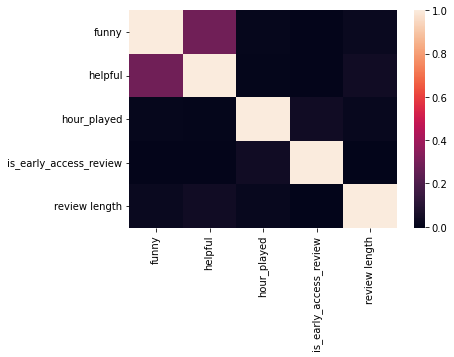

In [11]:
dataplot=sb.heatmap(test.corr())

In [17]:
yLabel = data['recommendation']
yLabel

0         True
1         True
2         True
3         True
4         True
          ... 
434886    True
434887    True
434888    True
434889    True
434890    True
Name: recommendation, Length: 434891, dtype: bool

In [21]:
data['date_posted'] = pd.to_datetime(data['date_posted'])

In [27]:
data['date_posted'] = (data['date_posted'] - data['date_posted'].min())  / np.timedelta64(1,'D')

In [22]:
data = data.drop('recommendation', 1)

KeyError: "['recommendation'] not found in axis"

In [32]:
data = data.drop('title', 1)

In [33]:
scaler = StandardScaler()

xTrain = scaler.fit_transform(data)
xTest = scaler.transform(data)

In [36]:
data

date_posted  funny  helpful  hour_played  is_early_access_review  \
0            2974.0      2        4          578                   False   
1            2974.0      0        0          184                   False   
2            2971.0      0        0          892                   False   
3            2733.0    126     1086          676                   False   
4            2374.0     85     2139          612                   False   
...             ...    ...      ...          ...                     ...   
434886       2889.0      1       37           10                   False   
434887       2889.0      3       41           38                   False   
434888       2892.0      0        0           36                   False   
434889       2890.0      1       44           12                   False   
434890       2954.0      1       28           20                   False   

        review  
0        195.0  
1          4.0  
2        171.0  
3       2094.0  
4       1397.0  
...        ...  
434886  1977.0  
434887  2535.0  
434888   730.0  
434889  1789.0  
434890  1054.0  

[434891 rows x 6 columns]

In [35]:
xTrain

array([[ 1.47101647, -0.01114377,  0.05038247,  0.39173017, -0.64221675,
        -0.04892089],
       [ 1.47101647, -0.01114382, -0.0168864 , -0.32993367, -0.64221675,
        -0.45237206],
       [ 1.46389567, -0.01114382, -0.0168864 ,  0.96686328, -0.64221675,
        -0.09961633],
       ...,
       [ 1.27638139, -0.01114382, -0.0168864 , -0.60101551, -0.64221675,
         1.08116483],
       [ 1.27163419, -0.0111438 ,  0.7230712 , -0.64497473, -0.64221675,
         3.31810088],
       [ 1.42354449, -0.0111438 ,  0.45399571, -0.63032166, -0.64221675,
         1.7655532 ]])

In [ ]:
test.corr()['funny']

In [ ]:
test.corr()['helpful']